In [ ]:
import sys  
!{sys.executable} -m pip install --user scikit-learn

In [66]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing #standardize the data
from sklearn.model_selection import train_test_split # split the dataset
from sklearn.model_selection import GridSearchCV # test parameters of classification algotithms and find the best one
from sklearn.linear_model import LogisticRegression #  Logistic Regression classification algorithm
from sklearn.svm import SVC #Support Vector Machine classification algorithm
from sklearn.tree import DecisionTreeClassifier # Decision Tree classification algorithm
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors classification algorithm

In [67]:
#plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm,annot=True,ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    plt.show()

In [68]:
#load the data
data = pd.read_csv('dataset_part_2.csv')
X = pd.read_csv('dataset_part_3.csv')

In [69]:
## Task 1
Y = data['Class'].to_numpy()
print(type(Y))

<class 'numpy.ndarray'>


In [70]:
## Task 2
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [72]:
## Task 3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
Y_test.shape

(18,)

In [73]:
## Task 4
#Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8875


In [77]:
## Task 5
#Calculate the accuracy on the test data using the method score
logreg_cv.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})>

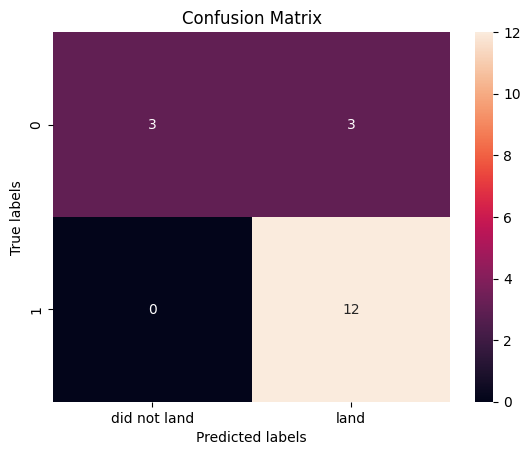

In [75]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

In [78]:
## Task 6
# Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10.
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters,cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8767857142857143


In [79]:
## Task 7
svm_cv.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})>

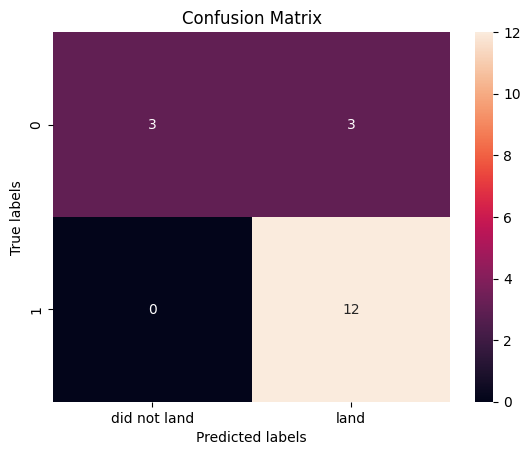

In [80]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [81]:
## Task 8
#Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10.
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8875


/Users/a123/Library/Python/3.10/lib/python/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/a123/Library/Python/3.10/lib/python/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a123/Library/Python/3.10/lib/python/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/a123/Library/Python/3.10/lib/python/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_co

In [82]:
## Task 9
tree_cv.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})>

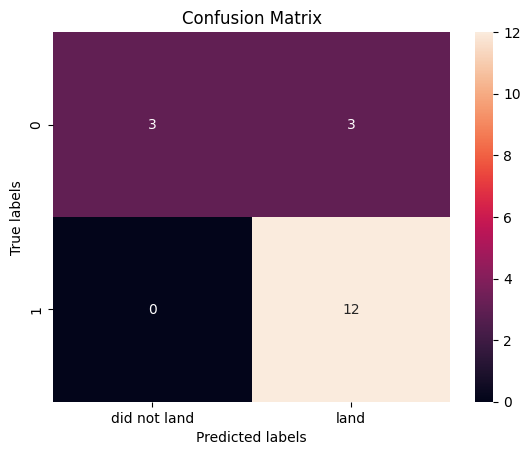

In [83]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [85]:
## Task 10
# Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8732142857142857


In [86]:
## Task 11
knn_cv.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})>

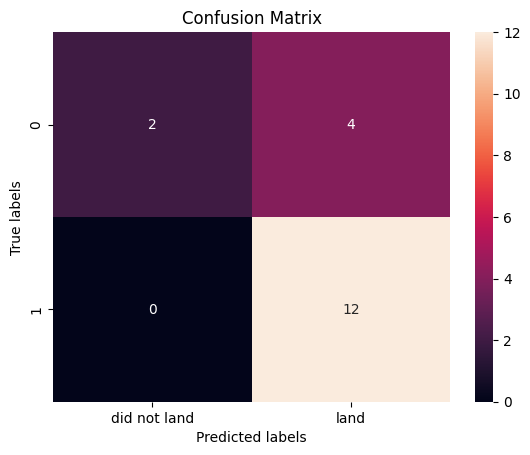

In [87]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
## Task 12
#Find the method performs best
